# EPS VGEO X-ray 18MV water phantom simulation

- Intel Xeon Gold 6148 (2.4GHz / 3.7GHz) 20 cores x 2 HT : Ubuntu 18.04LTS
- AMD EPYC 7501 (2GHz / 2.6 GHz / 3GHz)32 cores x 1 SMT : CentOS7
- IBM Power8 (3.42GHz) 10 cores x 2 8TH : Ubuntu 18.04LTS

In [48]:
import pandas

df_xeon = pandas.read_csv("vgeo-x18-xeon.dat", skipinitialspace=True)
df_epyc = pandas.read_csv("vgeo-x18-epyc.dat", skipinitialspace=True)
df_power = pandas.read_csv("vgeo-x18-power.dat", skipinitialspace=True)
df_centos = pandas.read_csv("vgeo-x18-xeon-centos.dat", skipinitialspace=True)

In [49]:
t0=df_xeon['eps'][0]
t1=df_epyc['eps'][0]
t2=df_power['eps'][0]

In [50]:
import matplotlib.pyplot as plt
import numpy

In [51]:
t = numpy.arange(0,40,1)
t32 = numpy.arange(0,33,1)
t20 = numpy.arange(0,21,1)
tx = t0*t
te = t1*t32
tp = t2*t20

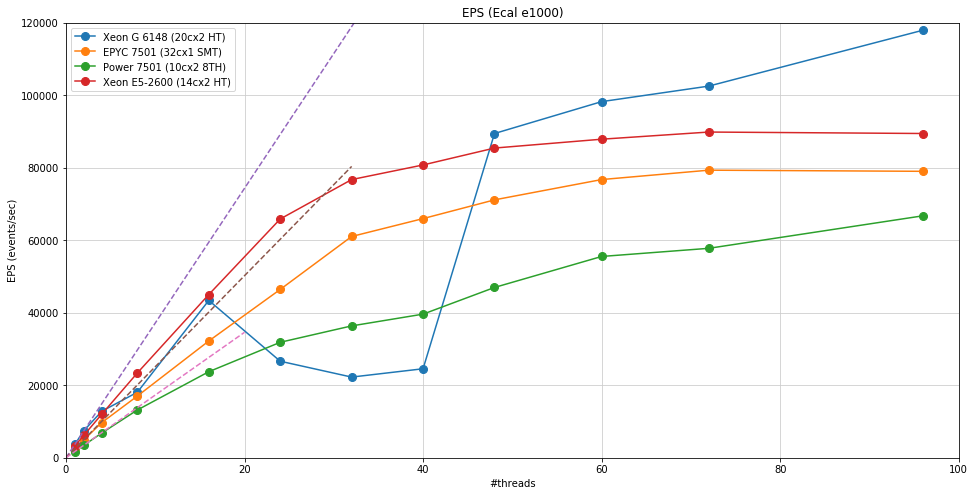

In [53]:
plt.figure(figsize=(16,8))
plt.title("EPS (Ecal e1000)")
plt.xlabel("#threads")
plt.ylabel("EPS (events/sec)")
plt.xlim([0,100])
plt.ylim([0,120000])
plt.grid(which="both", color="#cccccc")
plot = plt.plot(df_xeon['thread'], df_xeon['eps'], 'o-', markersize=8, label='Xeon G 6148 (20cx2 HT)')
plot = plt.plot(df_epyc['thread'], df_epyc['eps'], 'o-', markersize=8, label='EPYC 7501 (32cx1 SMT)')
plot = plt.plot(df_power['thread'], df_power['eps'], 'o-', markersize=8, label='Power 7501 (10cx2 8TH)')
plot = plt.plot(df_centos['thread'], df_centos['eps'], 'o-', markersize=8, label='Xeon E5-2600 (14cx2 HT)')
plot = plt.plot(t, tx, '--')
plot = plt.plot(t32, te, '--')
plot = plt.plot(t20, tp, '--')
plt.legend()

The performance of Intel Xeon CPU is very unstable in >24 threads cases. The same tendency is observed in other Ubuntu Intel CPU (Xeon SP) machines. CentOS7 machine (Xeon E5) seems fairly good.